In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tr-covid19.csv")

In [3]:
df.head()

,Unnamed: 0,Date,Total number of test,Total number of causes,Total number of deaths,Number of critically ill patients,Total Number of recoveries,number of cases,number of sick,number of test,number of deaths,Number of recoveries
0,0,26.05.2021,53038651.0,5212123,46787.0,1561.0,5057713.0,8738.0,681.0,221214.0,166.0,12205.0
1,1,25.05.2021,52817437.0,5203385,46621.0,1667.0,5045508.0,9375.0,693.0,223104.0,175.0,11192.0
2,2,24.05.2021,52594333.0,5194010,46446.0,1745.0,5034316.0,7523.0,702.0,216655.0,178.0,10003.0
3,3,23.05.2021,52377678.0,5186487,46268.0,1843.0,5024313.0,7839.0,710.0,210291.0,197.0,11202.0
4,4,22.05.2021,52167387.0,5178648,46071.0,1876.0,5013111.0,8697.0,835.0,216658.0,231.0,14472.0


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               442 non-null    object 
 1   Total number of test               426 non-null    float64
 2   Total number of causes             442 non-null    int64  
 3   Total number of deaths             436 non-null    float64
 4   Number of critically ill patients  302 non-null    float64
 5   Total Number of recoveries         426 non-null    float64
 6   number of cases                    183 non-null    float64
 7   number of sick                     426 non-null    float64
 8   number of test                     426 non-null    float64
 9   number of deaths                   426 non-null    float64
 10  Number of recoveries               418 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 38.1+ KB


In [7]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Month'] = df['Date'].dt.to_period('M')

In [8]:
df['Month'].value_counts()

2020-05    31
2020-07    31
2020-08    31
2020-10    31
2020-12    31
2021-01    31
2021-03    31
2020-04    30
2020-06    30
2020-09    30
2020-11    30
2021-04    30
2021-02    28
2021-05    26
2020-03    21
Freq: M, Name: Month, dtype: int64

In [10]:
number_of_sick_per_Month = df[["Month", "number of sick"]].groupby("Month").sum()

In [11]:
number_of_test_per_Month = df[["Month", "number of test"]].groupby("Month").sum()

In [12]:
number_of_deaths_per_month = df[["Month", "number of deaths"]].groupby("Month").sum()

In [13]:
number_of_recoveries_per_Month = df[["Month", "Number of recoveries"]].groupby("Month").sum()

In [14]:
df1 = pd.merge(number_of_test_per_Month,number_of_sick_per_Month, on="Month")
df2 = pd.merge(df1, number_of_deaths_per_month,on="Month")
dfsum = pd.merge(df2,number_of_recoveries_per_Month,on="Month")
dfsum

,number of test,number of sick,number of deaths,Number of recoveries
Month,,,,
2020-03,52113.0,9902.0,139.0,0.0
2020-04,941214.0,106673.0,2960.0,48402.0
2020-05,1005577.0,43738.0,1366.0,79087.0
2020-06,1342456.0,35964.0,591.0,45138.0
2020-07,1419173.0,30967.0,560.0,41424.0
2020-08,2337669.0,39260.0,679.0,30391.0
2020-09,3241769.0,48530.0,1825.0,34823.0
2020-10,3621553.0,56704.0,2057.0,44222.0
2020-11,4590478.0,125498.0,3494.0,80756.0


<function matplotlib.pyplot.show(close=None, block=None)>

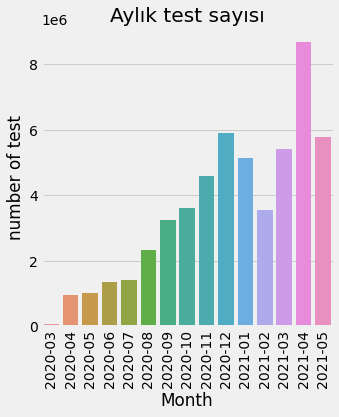

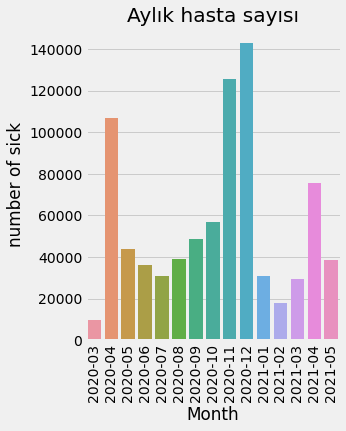

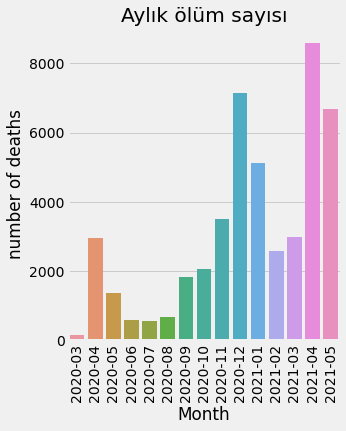

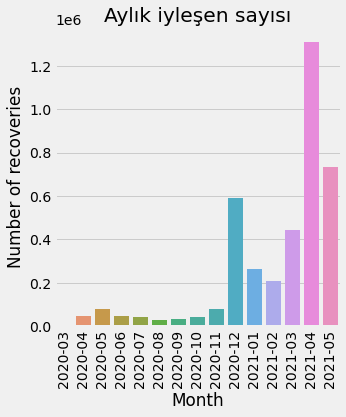

In [15]:

plt.style.use('fivethirtyeight')

a=sns.catplot(x =dfsum.index,y = "number of test",kind="bar",data=dfsum)
a.set_xticklabels(rotation=90)
plt.title("Aylık test sayısı")


a=sns.catplot(x =dfsum.index,y = "number of sick",kind="bar",data=dfsum)
a.set_xticklabels(rotation=90)
plt.title("Aylık hasta sayısı")



a=sns.catplot(x =dfsum.index,y = "number of deaths",kind="bar",data=dfsum)
a.set_xticklabels(rotation=90)
plt.title("Aylık ölüm sayısı")


a=sns.catplot(x =dfsum.index,y = "Number of recoveries",kind="bar",data=dfsum)
a.set_xticklabels(rotation=90)
plt.title("Aylık iyleşen sayısı")
plt.show

In [16]:
ttest = dfsum["number of test"].sum()
dfsum["number of test %"] = (dfsum["number of test"]*100)/ttest

tsick = dfsum["number of sick"].sum()
dfsum["number of sick %"] = (dfsum["number of sick"]*100)/tsick

tdeaths = dfsum["number of deaths"].sum()
dfsum["number of deaths %"] = (dfsum["number of deaths"]*100)/tdeaths

trecoveries = dfsum["Number of recoveries"].sum()
dfsum["number of recoveries %"] = (dfsum["Number of recoveries"]*100)/trecoveries
dfsum

,number of test,number of sick,number of deaths,Number of recoveries,number of test %,number of sick %,number of deaths %,number of recoveries %
Month,,,,,,,,
2020-03,52113.0,9902.0,139.0,0.0,0.098330,1.189388,0.297403,0.000000
2020-04,941214.0,106673.0,2960.0,48402.0,1.775948,12.813127,6.333176,1.224139
2020-05,1005577.0,43738.0,1366.0,79087.0,1.897392,5.253631,2.922675,2.000195
2020-06,1342456.0,35964.0,591.0,45138.0,2.533039,4.319850,1.264496,1.141589
2020-07,1419173.0,30967.0,560.0,41424.0,2.677794,3.719630,1.198169,1.047657
2020-08,2337669.0,39260.0,679.0,30391.0,4.410875,4.715752,1.452779,0.768621
2020-09,3241769.0,48530.0,1825.0,34823.0,6.116794,5.829226,3.904746,0.880711
2020-10,3621553.0,56704.0,2057.0,44222.0,6.833396,6.811054,4.401130,1.118422
2020-11,4590478.0,125498.0,3494.0,80756.0,8.661631,15.074310,7.475716,2.042406


In [17]:
 df.loc[df["number of deaths"].idxmax()]

Date                                 2021-04-30 00:00:00
Total number of test                          47261999.0
Total number of causes                           4820591
Total number of deaths                           40131.0
Number of critically ill patients                 3534.0
Total Number of recoveries                     4323897.0
number of cases                                  31891.0
number of sick                                    2673.0
number of test                                  265287.0
number of deaths                                   394.0
Number of recoveries                             68183.0
Month                                            2021-04
Name: 26, dtype: object

In [20]:
 df.loc[df["Number of recoveries"].idxmax()]

Date                                 2021-05-01 00:00:00
Total number of test                          47504193.0
Total number of causes                           4849408
Total number of deaths                           40504.0
Number of critically ill patients                 3525.0
Total Number of recoveries                     4405199.0
number of cases                                  28817.0
number of sick                                    2615.0
number of test                                  242194.0
number of deaths                                   373.0
Number of recoveries                             81302.0
Month                                            2021-05
Name: 25, dtype: object

## 2020 mart ayı ile 2021 mayıs ayı arasında Türkiyede covid19 verilerine göre;

### Bir ayda en fazla toplam vefat 7 135 kişi ile 2020 aralık ayında olmuş.

### Bir günde en fazla vefat 394 kişi ile 2021 30 nisanda olmuş.

### Bir ayda en fazla toplam iyileşen kişi ayısı ise 2021 nisan ayında 1 309 671 kişi iyileşmiştir.

### Bir günde en fazla  iyileşen kişi ayısı ise 2021 1 mayısta  81 302 kişi iyileşmiştir.